# Importing Libraries

In [ ]:
import praw
from pmaw import PushshiftAPI
import config

reddit = praw.Reddit(client_id = config.client_id,
                     client_secret = config.client_secret,
                         user_agent = config.user_agent)
import spacy
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
from IPython.display import Image
import requests
from bs4 import BeautifulSoup

--------------------

# First Steps with Spacy

[Natural Language Processing with spaCy & Python - Course for Beginners](https://www.youtube.com/watch?v=dIUTsFT2MeQ)

In [4]:
nlp = spacy.load("en_core_web_sm")

In [52]:
def load_wiki_us_text():
    with open ("data\\wiki_us.txt", "r") as f:
        text = f.read()
        
    return text

## Setting up Doc Object

In [10]:
doc = nlp(text)

In [14]:
for sent in doc.sents:
    print(f">> {sent}")

>> The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
>> It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
>> At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
>> The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world.
>> The national capital is Washington, D.C., and the most populous city is New York.


>> Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
>> The United States emerged from the thirtee

## Token Attributes

In [27]:
sentence_1 = list(doc.sents)[0]
print(sentence_1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [37]:
token_2 = sentence_1[2]
display(token_2)
display(token_2.text) # actual string in token
display(token_2.left_edge) # word left of token
display(token_2.right_edge) # word right of token (why "," here???)
display(token_2.ent_type_) # "GPE" = geopolitical entity
display(token_2.ent_iob_) # "I" = inside of (larger) entity // "B" = beginning of (larger) entity // "O" = outside of (larger) entity
display(token_2.lemma_) # Lemma = word stem; from which word does word come from
display(token_2.pos_) # "PROPN" = proper noun (part of speach)
display(token_2.dep_) # "nsubj" = noun subject (dependency; what roles does word play in sentence)

States

'States'

The

,

'GPE'

'I'

'States'

'PROPN'

'nsubj'

## Linguistic Annotations

In [38]:
text2 = "Paul enjoys progamming in Python."
doc2 = nlp(text2)
print(doc2)

Paul enjoys progamming in Python.


In [39]:
for token in doc2:
    print(token.text, token.pos_, token.dep_)

Paul PROPN nsubj
enjoys VERB ROOT
progamming VERB xcomp
in ADP prep
Python PROPN pobj
. PUNCT punct


In [40]:
from spacy import displacy

In [45]:
display(displacy.render(doc2, style="dep"))
display(displacy.render(doc2, style="ent"))

None

None

In [48]:
display(list(doc.sents)[4])
display(displacy.render(list(doc.sents)[4], style="dep"))

The national capital is Washington, D.C., and the most populous city is New York.


None

## Named Entity Recognition

In [49]:
for ent in doc.ents:
    print(ent.text, ent.label_)

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC
50 CARDINAL
five CARDINAL
326 CARDINAL
Indian NORP
3.8 million square miles QUANTITY
9.8 million square kilometers QUANTITY
fourth ORDINAL
United States GPE
Canada GPE
Mexico GPE
Bahamas GPE
Cuba GPE
more than 331 million CARDINAL
third ORDINAL
Washington GPE
D.C. GPE
New York GPE
Siberia LOC
North American NORP
at least 12,000 years ago DATE
European NORP
the 16th century DATE
The United States GPE
thirteen CARDINAL
British NORP
the East Coast LOC
Great Britain GPE
the American Revolutionary War ORG
1775â€“1783 CARDINAL
the late 18th century DATE
U.S. GPE
North America LOC
Native Americans NORP
1848 DATE
the United States GPE
United States GPE
the second half of the 19th century DATE
the American Civil War ORG
The Spanishâ€“American War and World War EVENT
U.S. GPE
World War II EVENT
the Cold War EVENT
the United States GPE
the Korean War EVENT
the Vietnam War EVENT


In [50]:
displacy.render(doc, style="ent")

## Word Vectors

In [77]:
nlp = spacy.load("en_core_web_md")

In [84]:
text = load_wiki_us_text()

In [85]:
doc = nlp(text)
sentence_1 = list(doc.sents)[0]
print(sentence_1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [90]:
your_word = "country"

ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)

['country—0,467', 'nationâ\x80\x99s', 'countries-', 'continente', 'Carnations', 'pastille', 'бесплатно', 'Argents', 'Tywysogion', 'Teeters']


In [88]:
docc_1 = nlp("I like salty fries and hamburgers.")
docc_2 = nlp("Fast food tastes very good.")
print(docc_1, "<->", docc_2, docc_1.similarity(docc_2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.691649353055761


In [89]:
docc_3 = nlp("The Brandenburger Gate is in Berlin.")
print(docc_1, "<->", docc_3, docc_1.similarity(docc_3))

I like salty fries and hamburgers. <-> The Brandenburger Gate is in Berlin. 0.2383041916182201


In [94]:
docc_4 = nlp("I like oranges.")
docc_5 = nlp("I like apples.")
print(docc_4, "<->", docc_5, docc_4.similarity(docc_5))

I like oranges. <-> I like apples. 0.9787322286815502


In [98]:
docc_6 = nlp("I like bike riding.")
print(docc_4, "<->", docc_6, docc_4.similarity(docc_6))

I like oranges. <-> I like bike riding. 0.8935012448685862


## Pipeline

---------------------------

# First Steps with PRAW

## Get Headlines from specific Subreddit

In [102]:
hot_posts = reddit.subreddit('MachineLearning').hot(limit=10) # get top 10 headlines by subreddit
for post in hot_posts:
    print(post.title)

[D] Simple Questions Thread
[D] Machine Learning - WAYR (What Are You Reading) - Week 140
[N] Google releases TensorStore for High-Performance, Scalable Array Storage
[D] What is the common/best practice for sharing codebase in data science team?
[P] New search engine that uses LLM's to find answers in scientific research
[R] A Generalist Neural Algorithmic Learner
[D] Some OpenAI Whisper benchmarks for runtime and cost
[D] Is there theory as to why in GANs, training the generator and discriminator intermittently proves ineffective?
[R] MapAI: Precision in Building Segmentation - Competition!
[N] Open working group to modularize ML Systems


## Access Subreddit Attributes

In [110]:
posts = []
ml_subreddit = reddit.subreddit('MachineLearning')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
display(posts)

,title,score,id,subreddit,url,num_comments,body,created
0,[D] Simple Questions Thread,6,xbkqzz,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,100,Please post your questions here instead of cre...,1.662908e+09
1,[D] Machine Learning - WAYR (What Are You Read...,165,vg5kjd,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,44,This is a place to share machine learning rese...,1.655675e+09
2,[N] Google releases TensorStore for High-Perfo...,268,xlje63,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,27,Blog post: [https://ai.googleblog.com/2022/09/...,1.663896e+09
3,[D] What is the common/best practice for shari...,2,xm2v33,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,"Hello, I wonder what is the common/best practi...",1.663952e+09
4,[P] New search engine that uses LLM's to find ...,41,xlhefg,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,19,Would love for this community to check it out ...,1.663891e+09
5,[R] A Generalist Neural Algorithmic Learner,7,xlqs92,MachineLearning,https://arxiv.org/abs/2209.11142,0,,1.663918e+09
6,[N] Open working group to modularize ML Systems,2,xlyiqu,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,Just to let you know that we are preparing a n...,1.663942e+09
7,[D] Some OpenAI Whisper benchmarks for runtime...,87,xl7mfy,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,23,Hey guys! I ran a [few benchmarks](http://www....,1.663868e+09
8,"[D] Is there theory as to why in GANs, trainin...",2,xlxqy3,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,3,It seems it is a common intuition everyone has...,1.663940e+09
9,[R] MapAI: Precision in Building Segmentation ...,1,xm28it,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,I'm happy to announce that I just launched an ...,1.663951e+09


### Get Subreddit Description

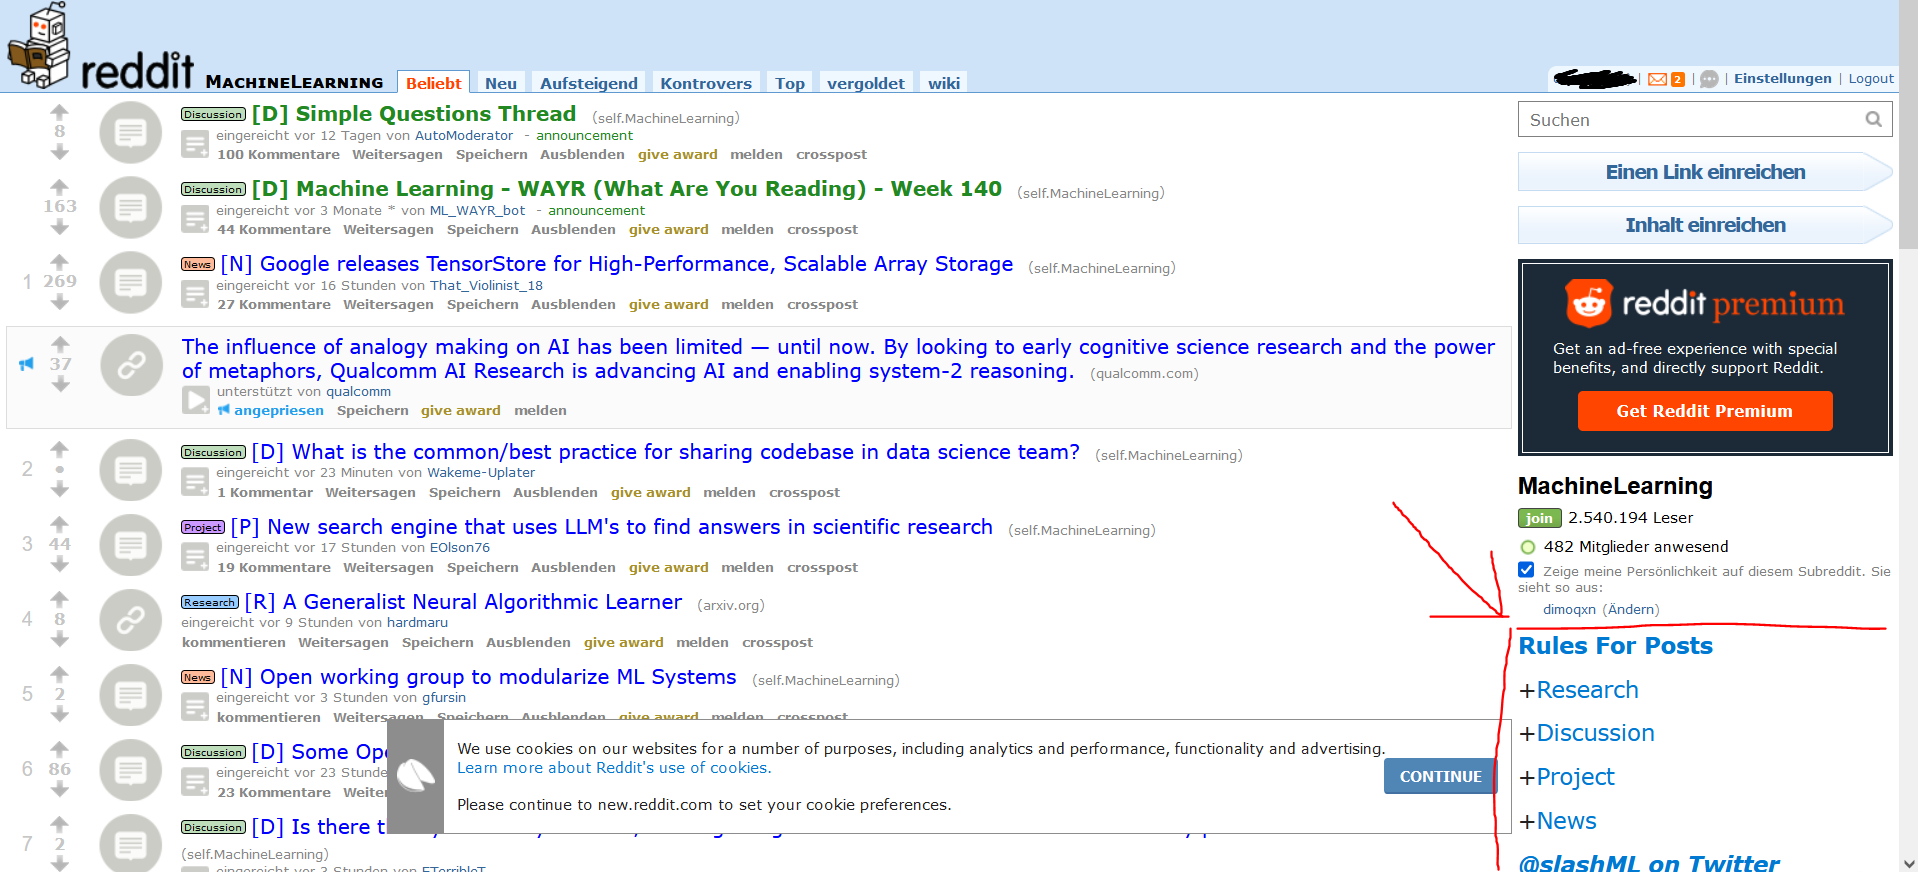

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

In [119]:
ml_subreddit = reddit.subreddit('MachineLearning')

display(Image(r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\DA_Final_Project\images\subreddit_description.PNG", width=800))

print(ml_subreddit.description)

## Access Comments in Subreddit

In [129]:
submission = reddit.submission(url="https://www.reddit.com/r/MachineLearning/comments")

InvalidURL: Invalid URL (submission ID not present): https://www.reddit.com/r/MachineLearning/comments

In [128]:
ml_submissions = reddit.submission('MachineLearning')
for top_level_comment in ml_submissions.comments:
    print(top_level_comment.body)

NotFound: received 404 HTTP response

-----------------

# First Steps with PMAW

In [ ]:
api = PushshiftAPI()

In [205]:
posts = api.search_submissions(subreddit="dataisbeautiful", limit=1000)
post_list = [post for post in posts]

Not all PushShift shards are active. Query results may be incomplete.


In [206]:
submission_ids = [post["id"] for post in post_list]

In [214]:
submission = reddit.submission(id=list(pd.Series(submission_ids).sample(1))[0])
submission

Submission(id='qhyq6o')

In [215]:
for top_level_comment in submission.comments:
    print(top_level_comment.body)

Looks neat, but I would change two things:

1. Take a Pacific-centered map, so that you have streams going out both sides and the China-stream does not have to be included in the Europe-stream.
2. Add transparency to the streams, so you can see both.
Hi, it´s me again, I´ve been improving the visual that I originally updated! 

  
Source: [https://wits.worldbank.org/countrystats.aspx?lang=en](https://wits.worldbank.org/countrystats.aspx?lang=en) (I programmed a web scrapper for it)   
Tool: Power BI 

If anyone is interested in changing the reporting country just DM me or write it as a comment and I´ll happily do that!
Could you do a visualization so that the red is on top of the blue? As it is, it looks like there's very few exports because the blue is on top of the red.
The subject of the whole thing is the US, and it's the only country that is cut off and not fully on the map.
Loving the improvement from yesterday already!


In [224]:
submission.comments[0].body

'Looks neat, but I would change two things:\n\n1. Take a Pacific-centered map, so that you have streams going out both sides and the China-stream does not have to be included in the Europe-stream.\n2. Add transparency to the streams, so you can see both.'

In [213]:
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    print(top_level_comment.body)

In [204]:
submission.comments.replace_more(limit=0)
for comment in submission.comments.list():
    print(comment.body)

Hello.  Please resubmit with either "LPT" or "LPT Request" as the prefix in your title so the moderators can see and review your post. 

*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/LifeProTips) if you have any questions or concerns.*


---------------------------

# Web Scraping Reddit

In [135]:
url = "https://www.reddit.com/r/popular/"
response = requests.get(url)
print(response.status_code) # 200 status code means OK!
soup = BeautifulSoup(response.content, "html.parser")

200
